<a href="https://colab.research.google.com/github/Rajendar98/pyTorch_Learning/blob/main/PyTorch_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
# Pytorch WorkFlow
# 1--> data(prepare and load)
# 2--> Build model
# 3--> fitting the model to data
# 4--> making predicitions and evaluting a model
# 5--> saving and loading a model
# 6--> putting it all  together

In [127]:
import torch
from torch import nn # nn contains of all pytorch building blocks for nueral network
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu121'

In [128]:
#create known paramets
weight = 0.7
bias =0.3
#create
s=0
e=1
step=0.02
X=torch.arange(s,e,step).unsqueeze(dim=1)
y=weight * X+bias
# print(X,end=" ")
# print(y)
print(len(X),len(y))

50 50


In [129]:
a=int(0.8 * len(X))
x_train,y_train,x_test,y_test=X[:a],y[:a],X[a:],y[a:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [130]:
def plot_predicitions(train_data=x_train,
                      train_labels=y_train,
                      test_data=x_test,
                      test_labels=y_test,
                      predictions=None):
  plt.figure(figsize=(4,3))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c="r",s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="g",s=4,label="Predicitons")
  plt.legend(prop={"size":8})

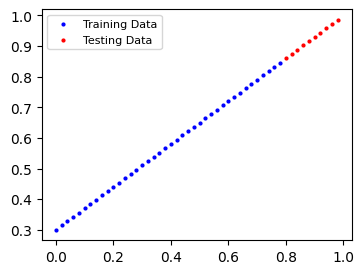

In [131]:
plot_predicitions()

 ## Build linear Regression Model

In [132]:
class Regression_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weight*x+self.bias

In [133]:
torch.manual_seed(42)
model_O=Regression_model()
print(list(model_O.parameters()))
print(model_O.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [134]:
## making predicitions using torch.inference_mode()

In [135]:
with torch.inference_mode():
  y_pred=model_O(x_test)
# with torch.no_grad():
#   y_pred=model_O(x_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

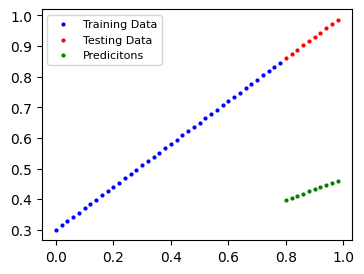

In [136]:
plot_predicitions(predictions=y_pred)  # we need to train our model the predictions values not close the y_test values

In [137]:
#setup the loss function
loss_fn=nn.L1Loss() # torch.mean(torch.abs(y_pred-y_test))
#setup optimizer
optimizer=torch.optim.SGD(params=model_O.parameters(),lr=0.01) #lr-->learning rate
# if small lr results in small changes,a large lr results in large changes

In [138]:
# Building a traning loop

In [139]:
torch.manual_seed(42)
epochs=200
e_cnt,l_values,t_l_values=[],[],[]
for epoch in range(epochs):
  model_O.train()
  y_pred=model_O(x_train)
  loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_O.eval()
  with torch.inference_mode():
    test_pred=model_O(x_test)
    test_loss=loss_fn(test_pred,y_test)
  if epoch % 10==0:
    e_cnt.append(epoch)
    l_values.append(loss)
    t_l_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_O.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [140]:
with torch.inference_mode():
  y_preds_new=model_O(x_test)

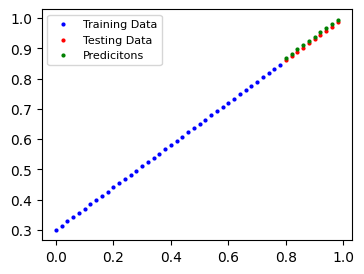

In [141]:
plot_predicitions(predictions=y_preds_new)

In [142]:
from pathlib import Path
model_path=Path("Models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="Pytorch_workflow"
model_save_path=model_path/model_name
print(f"Saving model to:{model_save_path}")
torch.save(obj=model_O.state_dict(),f=model_save_path)

Saving model to:Models/Pytorch_workflow


In [143]:
model_O.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [144]:
loaded_model_O=Regression_model()
loaded_model_O.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [145]:
loaded_model_O.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_O(x_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [146]:
model_O.eval()
with torch.inference_mode():
  y_preds=model_O(x_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [147]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])